In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy import integrate
import AnaUtils as au
import Triggered as tr
import glob
import os
from matplotlib.offsetbox import AnchoredText
from pylab import rcParams

In [11]:
pmt = "KA0221"
wdir = '/media/easystore/ReplacementPMTs'
fWaves = [os.path.splitext(iF)[0] for iF in glob.glob('{}/{}/Lin/*.bin'.format(wdir,pmt))]
Gains = np.array([iF.split('/')[-1].split('_')[0] for iF in fWaves])
fWaves,Gains

(['/media/easystore/ReplacementPMTs/KA0221/Lin/1631V_1PE_200825_100_samples_20000_events'],
 array(['1631V'], dtype='<U5'))

{'numEvents': 20000, 'numSamples': 100, 'chMap': array([1, 0, 1]), 'numChan': 2, 'file': '/media/easystore/ReplacementPMTs/KA0221/Lin/1631V_1PE_200825_100_samples_20000_events'}


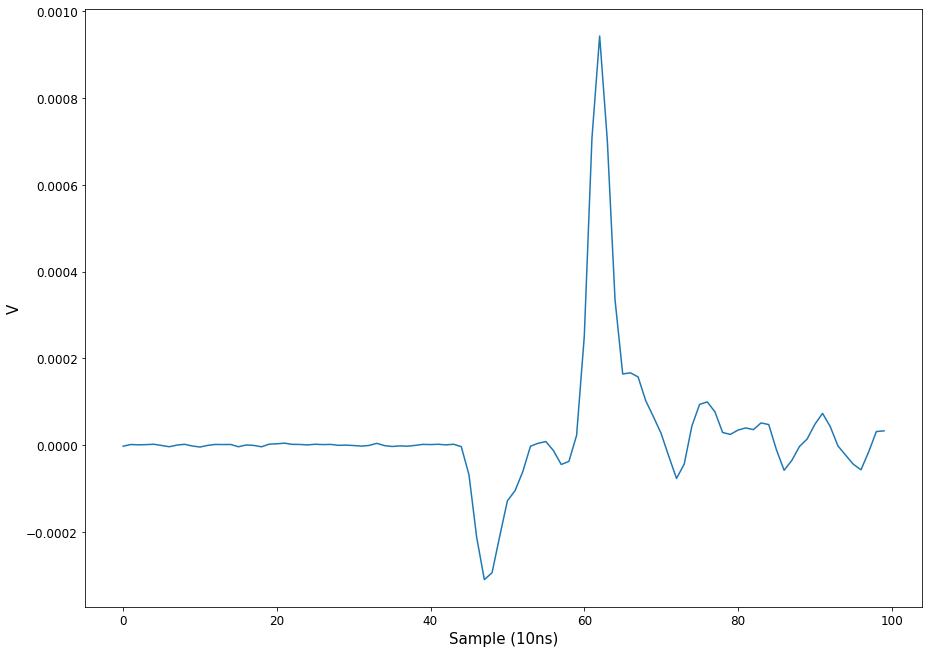

In [12]:
QHists = [tr.extRun(iG,30,5,5,qbins=200,qW=0.1,plot=False,ret=True) for iG in fWaves]
#QHists = [tr.extRun(fWaves[0],30,5,5,qbins=200,plot=True)]

OrderedDict([('Q0', 0.0015537863488749506), ('Q1', 0.5362000903228855), ('s0', 0.14972093406010362), ('s1', 0.4422574404425878), ('u', 0.40084363517038796), ('chi2', Power_divergenceResult(statistic=9239.937188259571, pvalue=0.0)), ('norm', 119.84931334447572)]) OrderedDict([('Q0', 7.779326942200357e-07), ('Q1', 0.0005558998060857465), ('s0', 1.6530415664520622e-06), ('s1', 0.00022808565462358152), ('u', 0.00018014976061385093)])


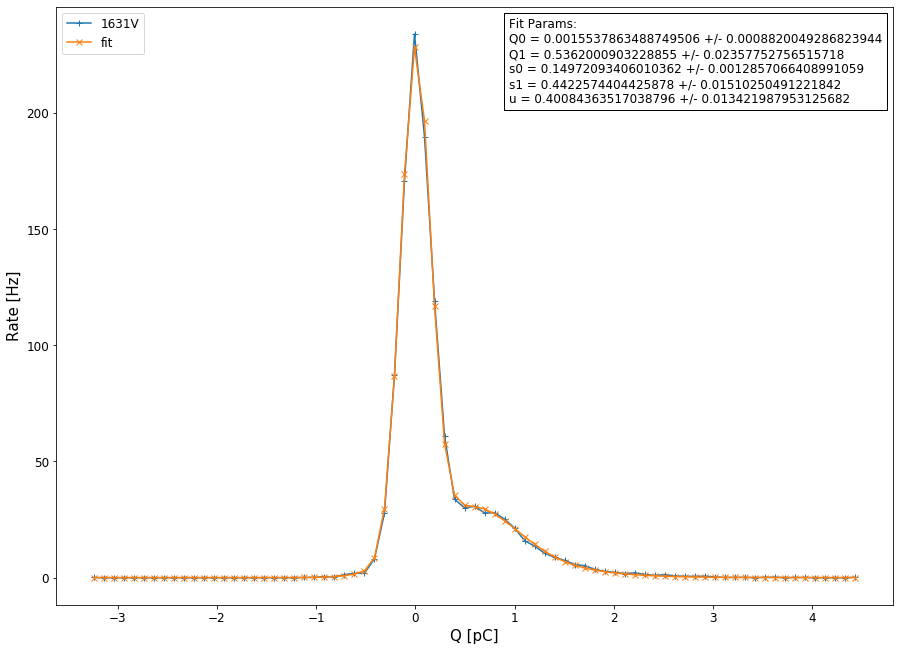

In [13]:
p = {'Q0':0,'Q1':1.6,'s0':0.2,'s1':0.8,'u':1.5}
rcParams['figure.figsize'] = 15, 11
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
for iq in range(len(QHists)):
    plt.clf()
    GFit,GErr = tr.fitQP(QHists[iq][0],p,N=100)
    print(GFit,GErr)
    plt.plot(QHists[iq][0][1],QHists[iq][0][0],marker='+',label=Gains[iq])
    plt.plot(QHists[iq][0][1],GFit['norm']*tr.gpn(QHists[iq][0][1],100,*list(GFit.values())[:-2]),marker='x',label='fit')
    plt.xlabel('Q [pC]')
    plt.ylabel('Rate [Hz]')
    plt.legend(loc=2)
    #fit parameters
    spar = ['{} = {} +/- {}'.format(fk,GFit[fk],np.sqrt(GErr[fk])) for fk in list(GFit.keys())[:-2]]
    anctxt = AnchoredText('Fit Params:\n'+'\n'.join(np.array(spar)), loc=1)
    plt.gca().add_artist(anctxt)
    svfname="{}/figs/{}_{}_Lin.png".format(wdir,pmt,Gains[iq])
    plt.savefig(svfname)
    plt.show()